# Experiência de Millikan

$m= \rho \frac{4}{3} \pi  R^3 $    
$F_a= - k \eta v$   
$   \frac{d v}{dt} =  g -  \frac{k \eta}{m} v$

Solução Analítica   $v(t)= \frac{m g}{k \eta} (1 - e^{-( k \eta/m) t}  ) = v_L (1 - e^{-t/\tau})$   
$\tau= k \eta / m  $ ,  $v_L= \frac{m g}{k \eta}  $

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
#from matplotlib.ticker import MultipleLocator
import numpy as np
from scipy import constants # Constantes Físicas
from scipy.integrate import odeint
import ipywidgets as widgets

In [38]:
#Raio da gota
R=5e-6
k=6*np.pi*R
#18,52 · 10−6 Pa·s (viscosidade do ar a 23 ◦C)
n=18.52-6
#massa da gota
m=4.0/3.0*np.pi*R**3*973
g=9.8
tau=m/k /n
tau

## Solução do movimento por integração numérica da equação diferencial

In [35]:
def Queda(y, t, b, c):
    z, vz = y
    dydt = [vz, b + c * vz]
    return dydt

In [37]:
#condições iniciais (z_0,vz_0)
y0 = [0.0, 0.0]
t = np.linspace(0, 1e-8, 101)
sol = odeint(Queda, y0, t, args=(-g, -k *n / m))


4.317536386226482e-10

<IPython.core.display.Javascript object>


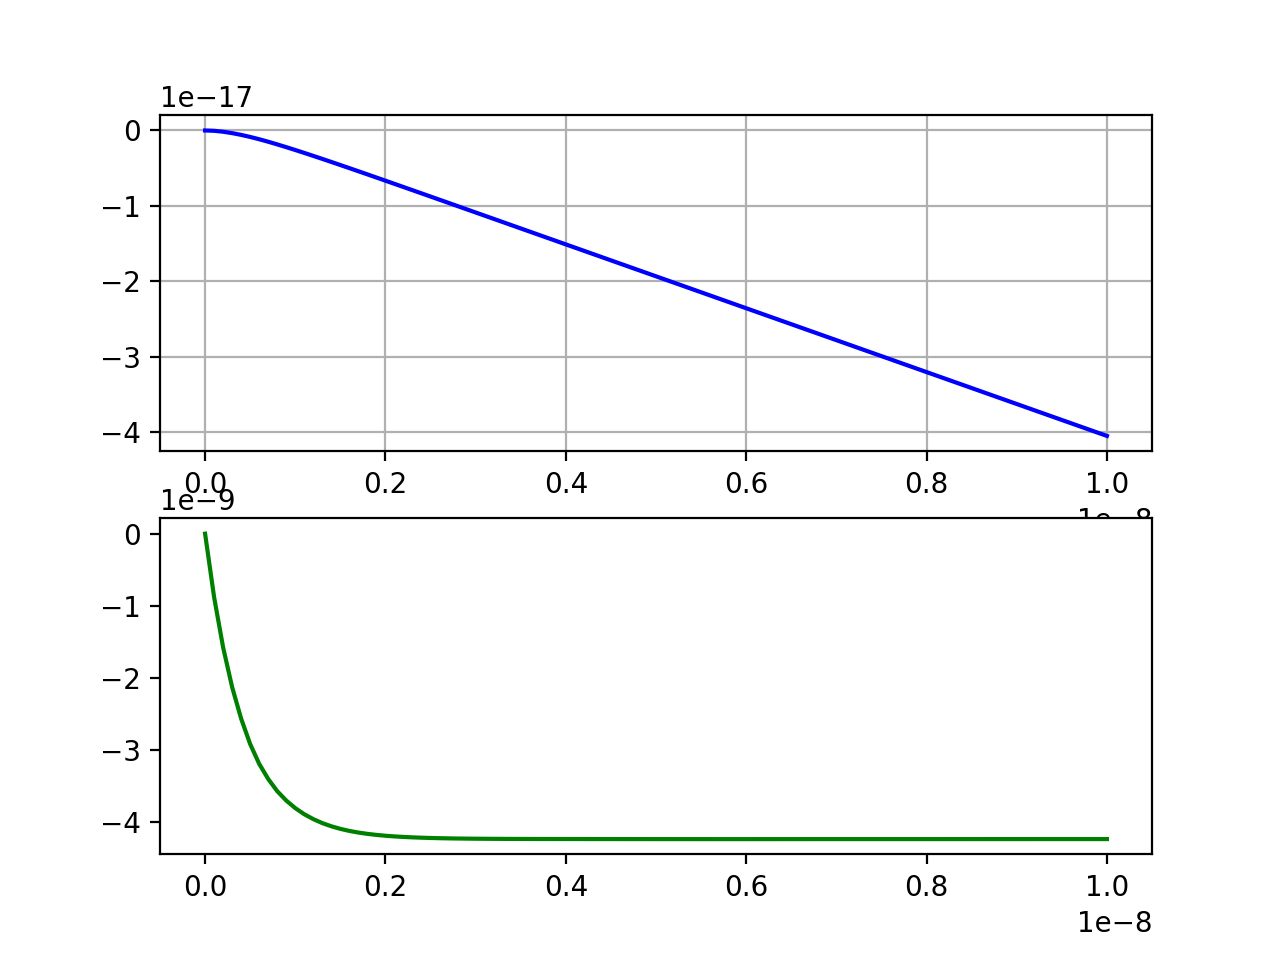

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(211) #, autoscale_on=False, xlim=(0, 10), ylim=(-1, 1))
ax2 = fig.add_subplot(212) #, autoscale_on=False, xlim=(-1, 1), ylim=(-1, 1))

#ax1.plot(theta, y,label='Emitido-CH1')
ax1.plot(t, sol[:, 0], 'b', label='z(t)')
ax1.grid()
ax2.plot(t, sol[:, 1], 'g', label='vz(t)')
#plt.legend(loc='best')
#ax1.xlabel('t')
fig.show()
